In [9]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
X = pickle.load(open('Data/Image_Pixels.pickle','rb'))
y = pickle.load(open('Data/Image_Labels.pickle', 'rb'))

In [11]:
X = X/255.0

In [12]:
model = Sequential()
model.add(Conv2D(128, (4,4), padding='same',activation='relu', input_shape=X.shape[1:],data_format="channels_last"))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(64, (4,4), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 128)       2176      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        131136    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
__________

In [13]:
#saving Weights
checkpointer = ModelCheckpoint(filepath='Data/Sign_model.h5', verbose=1, save_best_only=True)

hist = model.fit(X, y, epochs=10,
                 shuffle=True,
                 batch_size=200, validation_split=0.1, callbacks=[checkpointer], verbose=2)

#saving Model
model_json = model.to_json()
with open("Data/Sign_model.json", "w") as json_file:
    json_file.write(model_json)

Train on 31164 samples, validate on 3463 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 0.64422, saving model to Data/Sign_model.h5
 - 29s - loss: 1.8021 - acc: 0.4592 - val_loss: 0.6442 - val_acc: 0.7984
Epoch 2/10

Epoch 00002: val_loss improved from 0.64422 to 0.16615, saving model to Data/Sign_model.h5
 - 28s - loss: 0.2801 - acc: 0.9194 - val_loss: 0.1662 - val_acc: 0.9578
Epoch 3/10

Epoch 00003: val_loss improved from 0.16615 to 0.04783, saving model to Data/Sign_model.h5
 - 28s - loss: 0.0624 - acc: 0.9877 - val_loss: 0.0478 - val_acc: 0.9910
Epoch 4/10

Epoch 00004: val_loss improved from 0.04783 to 0.01853, saving model to Data/Sign_model.h5
 - 28s - loss: 0.0147 - acc: 0.9991 - val_loss: 0.0185 - val_acc: 0.9971
Epoch 5/10

Epoch 00005: val_loss improved from 0.01853 to 0.00663, saving model to Data/Sign_model.h5
 - 28s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 1.0000
Epoch 6/10

Epoch 00006: val_loss improved from 0.00663 to 0.00398, saving 

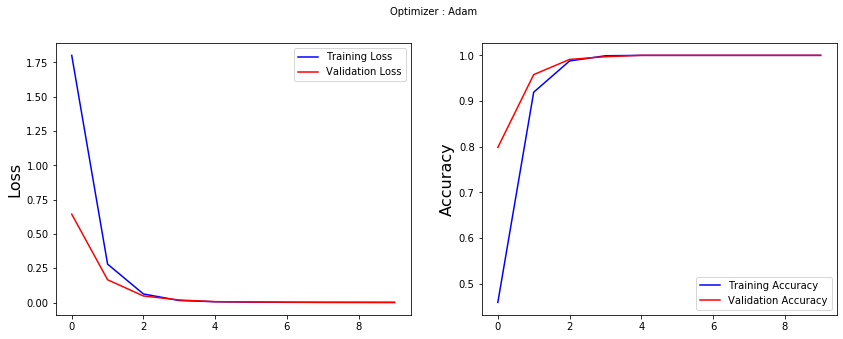

In [15]:
fig = plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Images/Model_Performance.png', dpi=fig.dpi)